# Figures for the giant number fluctuations project (DF)

## General guidelines

- This notebook contains finalized code for making the figures in the giant number fluctuations paper. This notebook contains code for two purposes:
    - summarizing code: summarizes batch data into a more condensed form
    - plotting: read data from data_summary spreadsheet, and plot the data (the sheet should locate in Google Drive\corresponding research project folder\data\data_summary.xlsx).
- Figure organization
    - Figures will be organized under corresponding sections (h2 title). 
    - Subfigures (panels) will be under subsections (h3 title). 
    - Each subsection should be self-complete, meaning that to plot a certain figure, only the code in that specific section needs to be run, except importing packages (which should always be the first thing to run when starting the notebook.
- Ideas and plans that haven't been implemented should be listed in the **Plans** block, in <font color='blue'>blue color</font>.
- While notebooks for each specific figure is still kept in this directory, they are used mainly for drafting figures, testing code and trying out ideas. Once a figure is finalized, copy the corresponding code to this notebook.

## <font color='blue'> Plans

<font color='blue'>
    
- ...
    
    
</font>

## Table of contents

- Figure 1: experimental setup and images
    - (a) low concentration
    - (b) low concentration with PIV overlay
    - (c) high concentration
    - (d) high concentration with PIV overlay
- Figure 2: spatial correlation functions and correlation lengths
    - (a) velocity correlation
    - (b) concentration correlation
    - (c) correlation length
    - (d) ratio between two correlation lengths
- Figure 3: concentration dependence of $\alpha$
    - (a) standard deviation at various subsystem sizes
    - (b) concentration dependence of $\alpha$
    - (c) concentration dependence of energy $E$
    - (d) concentration dependence of $OP$
    - (e) plot $\alpha$ and $E$ on the same axis
- Figure 4: evolution
    - (a) standard deviation during the onset of active turbulence
    - (b) temporal evolution of $\alpha$, $E$ and $OP$
- Figure 5: local correlations between concentration fluctuations and flow energy - microscopic origin
    - main: local correlations between concentration fluctuations and flow energy
    - Inset: show two fields with high correlation at an instance
- Figure 6: dimensionality effect
    - $\alpha$ and $E$ at different gap thickness (twinx)
- Figure 7: $\alpha$ as a function of $E$
- Figure 8: energy spectrum analysis
    - (a) energy spectrum at various concentrations
    - (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations
    - (c) energy density at the limit k -> 0 (compare with simulation in [Bardfalvy 2019](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract))

## Packages

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from myImageLib import wowcolor, bestcolor
import numpy as np
import os
from corrLib import readdata
from corr_utils import *
from scipy.signal import savgol_filter
import typesetting.main as tm
from IPython.display import clear_output
tm.prl('1-column-2-panel')
dirs = data_log_mapping(kw='aug')
from matplotlib.patches import Rectangle

## Figure 1: experimental setup and images
- (a) low concentration
- (b) low concentration with PIV overlay
- (c) high concentration
- (d) high concentration with PIV overlay

### (a) low concentration

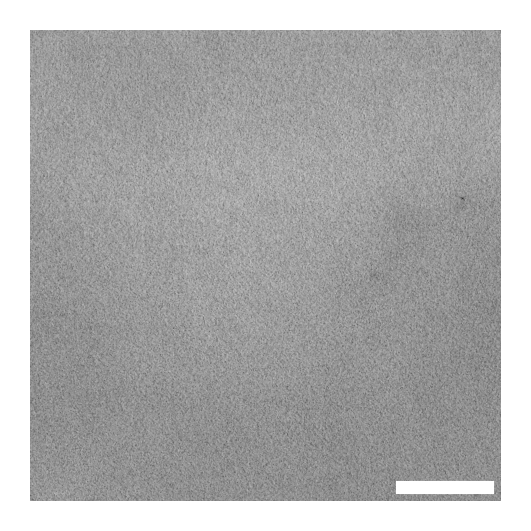

In [4]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\40-900.tif')
h, w = img.shape
wf = 1.57
hf = h / w * wf
fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

### (b) low concentration with PIV overlay

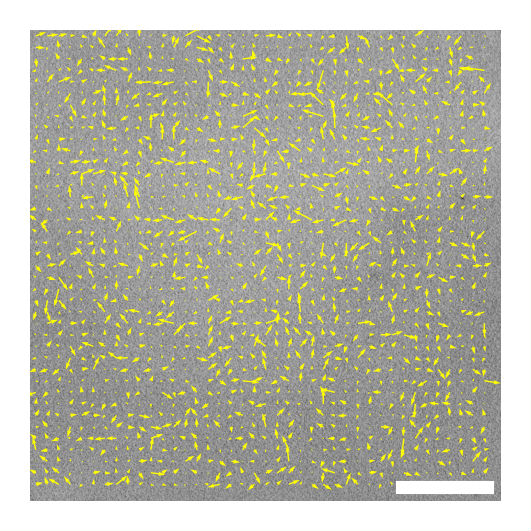

In [53]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\40-900.tif')
pivData = pd.read_csv(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\40-900-piv.csv')
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
h, w = img.shape
wf = 1.57
hf = h / w * wf

fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, sparcified_pivData.v, color='yellow', width=0.003)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

output_folder = r'E:\Github\GNF-paper\V_1\Figures\fig-1'
fig.savefig(os.path.join(output_folder, 'v3c.pdf'))

### (c) high concentration

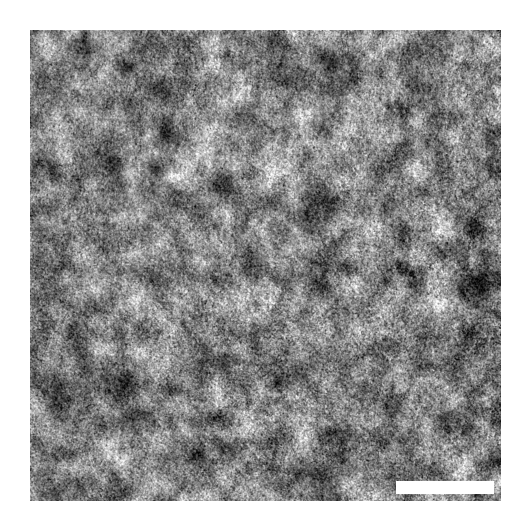

In [3]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\80-900.tif')
h, w = img.shape
wf = 1.57
hf = h / w * wf
fig = plt.figure(figsize=(hf, wf), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)
# fig.savefig(os.path.join(output_folder, '80_raw.png'))

### (d) high concentration with PIV overlay

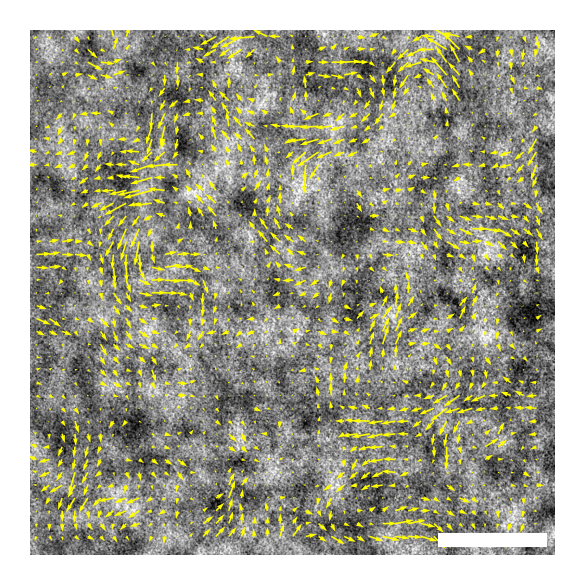

In [52]:
img = io.imread(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\80-900.tif')
pivData = pd.read_csv(r'E:\Google Drive\Research projects\DF\Figures\fig1-experiment\raw\80-900-piv.csv')
sparcified_pivData = sparcify_piv(pivData, sparcity=2)
fig = plt.figure(figsize=(1.75, 1.75), dpi = 300)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img, cmap='gray')
ax.quiver(sparcified_pivData.x, sparcified_pivData.y, sparcified_pivData.u, sparcified_pivData.v, color='yellow', width=0.003)
ax.axis('off')
shape, xy = scalebar_shape_position(img.shape)
draw_scalebar(ax, shape, xy)

output_folder = r'E:\Github\GNF-paper\V_1\Figures\fig-1'
fig.savefig(os.path.join(output_folder, 'v3b.pdf'))

## Figure 2: spatial correlation functions and correlation lengths

- (a) velocity correlation
- (b) concentration correlation
- (c) correlation length
- (d) ratio between two correlation lengths

### (a) Velocity correlation

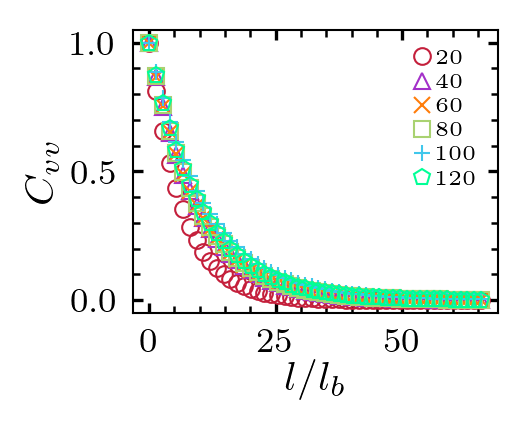

In [3]:
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorrV-1.csv')
data.R = data.R - data.R.min()
ax, cl_data = plot_correlation(data, xlim=600, plot_cols=['R', 'C'])
ax.set_xlabel('$l/l_b$')
ax.set_ylabel('$C_{vv}$')
ax.legend(fontsize=5) 

### (b) Concentration correlation

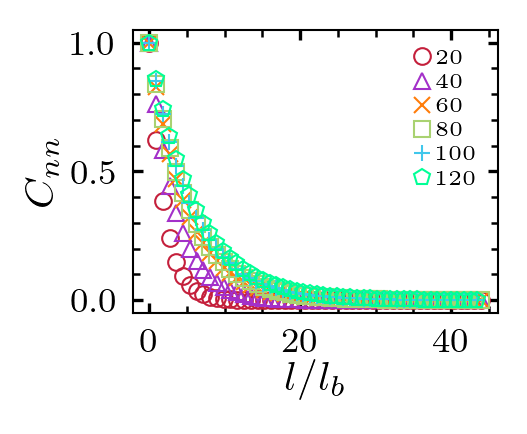

In [4]:
data = pd.read_csv(r'I:\Google Drive\Research projects\DF\Figures\fig3-spatialCorr\spatialCorr-1.csv')
ax, cl_data = plot_correlation(data, xlim=400)
ax.set_xlabel('$l/l_b$')
ax.set_ylabel('$C_{nn}$')
ax.legend(fontsize=5) 

### (c) Correlation lengths

In [6]:
# velocity correlation
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrV')
data = data.dropna()
# concentration correlation
data1 = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrI')
data1 = data1.dropna()

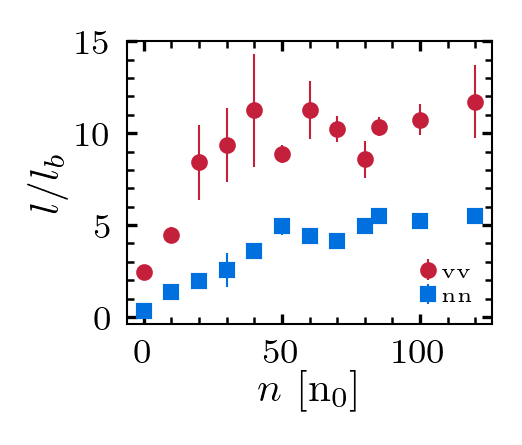

In [7]:
plt.figure(dpi=300)
plt.errorbar(data['conc'], data['avg']*0.33/3, yerr=data['std']*0.33/3, 
             ls='', elinewidth=0.5, marker='o', label='vv', markersize=3, color=wowcolor(0))
plt.errorbar(data1['conc'], data1['avg']*0.33/3, yerr=data1['std']*0.33/3, 
             ls='', elinewidth=0.5, marker='s', label='nn', markersize=3, color=wowcolor(8))
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$l/l_b$')
plt.legend(loc='lower right', fontsize=5)

### (d) Ratio between two correlation lengths

In [9]:
# velocity correlation
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrV')
data = data.dropna()
# concentration correlation
data1 = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='corrI')
data1 = data1.dropna()
lv = np.array(data['avg'])
ln = np.array(data1['avg'])

Text(0, 0.5, '$l_{vv}/l_{nn}$')

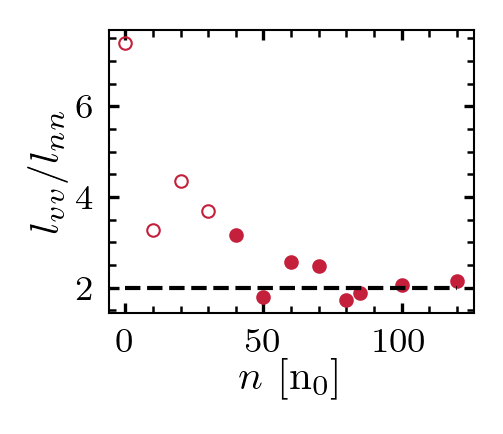

In [10]:
plt.figure(dpi=300)
plt.plot(data['conc'][0:4], (lv/ln)[0:4], marker='o', ls='', mfc=(0,0,0,0),
        mew=0.5, mec=wowcolor(0), markersize=3)
plt.plot(data['conc'][4:], (lv/ln)[4:], marker='o', ls='', mfc=wowcolor(0),
        mew=0.5, mec=wowcolor(0), markersize=3)
plt.plot([0, 120], [2, 2], ls='--', color='black', lw=1)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$l_{vv}/l_{nn}$')

### Miscellaneous

In [15]:
# summarize data
# sample 10 frames out of the last 1/3 of frames
corr_data_path = r'E:\moreData\08052020\cav_imseq'
num_sample = 20 # number of frames to sample
sample_clA = []
sample_clV = []
sfL = next(os.walk(corr_data_path))[1]
sfL_new = []
for s in sfL:
#     print('sample ' + str(n))
    corr_data_path_num = os.path.join(corr_data_path, s)
    
    # sample 20 frames in the last 1/3 frames
    
    l = len(corrLib.readdata(corr_data_path_num))
    if l > 60:
        samples = np.random.randint((l*2/3)/2, (l-1)/2, num_sample) * 2
        clAL = []
        clVL = []
        for i in samples:
            data_raw = pd.read_csv(os.path.join(corr_data_path_num, '{0:04d}-{1:04d}.csv'.format(i, i+1))) # X Y CA CV
            data_AV = xy_to_r(data_raw).sort_values(by=['R'])     
            clA, fit = corr_length(data_AV.rename(columns={'CA': 'C'}), fitting_range=500)
            clV, fit = corr_length(data_AV.rename(columns={'CV': 'C'}), fitting_range=500)
            clAL.append(clA)
            clVL.append(clV)
        sample_clA.append(np.array(clAL).mean())
        sample_clV.append(np.array(clVL).mean())
        sfL_new.append(int(s))
    else:
        raise ValueError('Too few data to sample from. Need at least 60 .csv files.')
summary = pd.DataFrame({'sample': sfL_new, 'clA': sample_clA, 'clV': sample_clV})
summary.to_csv(os.path.join(corr_data_path, 'summary.csv'), index=False)
### Needs further improvement

In [36]:
# retrieve data from cav_imseq/summary.csv
folder = r'E:\moreData'
subfolder_name = 'cav_imseq'
data = {'conc': [], 'clA_avg': [], 'clV_avg': [], 'clA_std': [], 'clV_std': []}
for kw in dirs:
    if kw != '00':
        conc = int(kw)
        for n, dn in enumerate(dirs[kw]):
            date, num = dn.split('-')
            summary_dir = os.path.join(folder, date, subfolder_name, 'summary.csv')
            temp = pd.read_csv(summary_dir, index_col='sample').loc[[int(num)]]
            if n == 0:
                conc_data = temp
            else:
                conc_data = conc_data.append(temp)
        data['conc'].append(conc)
        data['clA_avg'].append(conc_data.clA.mean())
        data['clV_avg'].append(conc_data.clV.mean())
        data['clA_std'].append(conc_data.clA.std())
        data['clV_std'].append(conc_data.clV.std())

## Figure 3: concentration dependence of $\alpha$

- (a) standard deviation at various subsystem sizes
- (b) concentration dependence of $\alpha$
- (c) concentration dependence of energy $E$

### (a) standard deviation at various subsystem sizes

In [4]:
date = []
num = []
conc = []
for kw in dirs:
    if int(kw) <= 120:
        conc.append(int(kw))
        d, n = dirs[kw][1].split('-')
        date.append(d)
        num.append(int(n))
data_log = pd.DataFrame().assign(conc=conc, date=date, num=num).sort_values(by='conc')
# NOTE: 
# This block is not elegant. I want to use a consistent method to load experiment log information and map them to data.
# Throughout this project, I have implemented no less than three of such methods. Yet, none of them are intuitive or easy to use.
# Keep this block here for now, change it in the future.

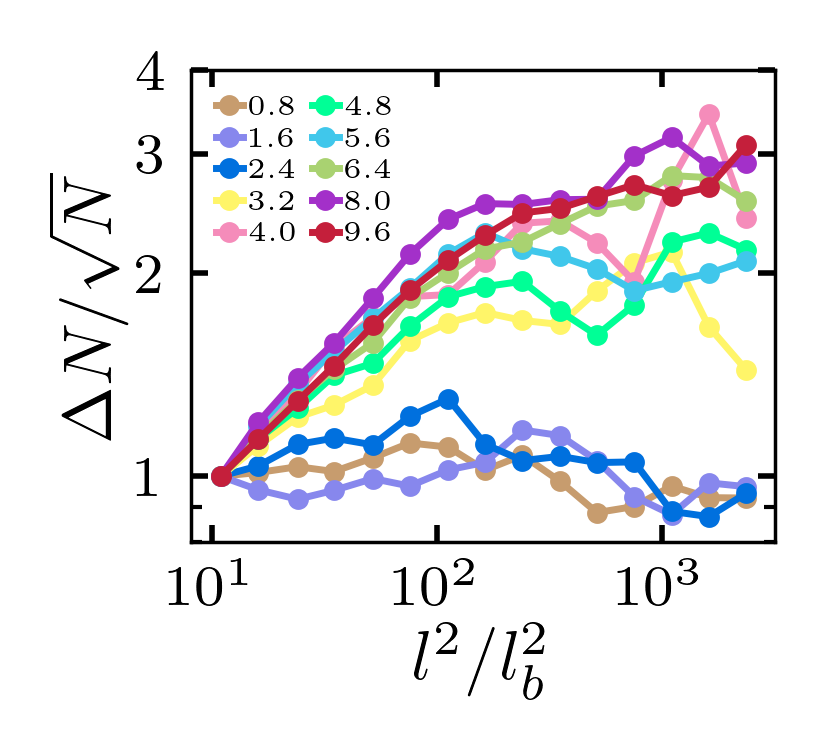

In [29]:
lb = 10
fig, ax = plt.subplots(figsize=(1.75, 1.6), dpi=500)
data_dir = r'E:\moreData\{0}\df2_kinetics\{1:02d}\kinetics_data.csv'
for num, i in data_log.iterrows():
    if i.conc != 0 and i.conc != 85:# and i.conc < 40:     # for animation in slides   
        k_data = pd.read_csv(data_dir.format(i.date, i.num))
        gnf_data = k_data.loc[k_data.segment==k_data.segment.max()]
        x, y = postprocess_gnf(gnf_data, lb, xlim=[10, 10000], sparse=2)
        ax.plot(x, y, marker='o', label='{:.1f}'.format(i.conc*0.08), color=wowcolor(num), markersize=2, lw=1)
ax.loglog()
ax.legend(loc='upper left', ncol=2, fontsize=4)
ax.set_xlabel('$l^2/l_b^2$')
ax.set_ylabel(' $\Delta N/\sqrt N$')
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['1', '2', '3', '4'])
ax.set_xticks([10, 100, 1000])
ax.set_xlim([8, 3200])
ax.set_ylim([0.8, 4])
plt.tight_layout()
fig.savefig(r'E:\Google Drive\Research projects\DF\presentation\dN~N\high.jpg')

### (b) concentration dependence of $\alpha$

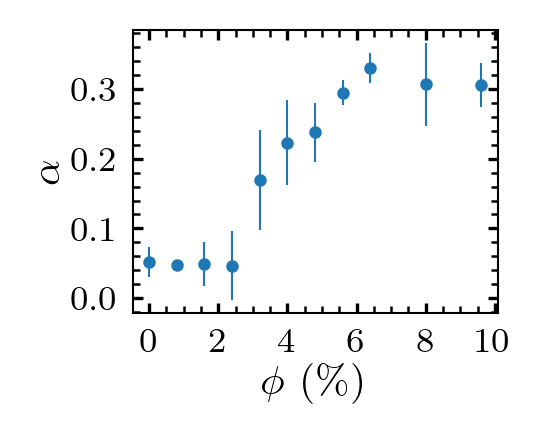

In [17]:
# load data and plot
fig, ax = plt.subplots(dpi=300)
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='df2')
# data = data.dropna()
ax.errorbar(data['conc'] * 0.08, data['avg'], yerr=data['std'], ls='', elinewidth=0.5, marker='o', markersize=2)
# ax.set_xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$')
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.set_xticks([0, 2, 4, 6, 8, 10])

### (c) concentration dependence of energy $E$

([<matplotlib.axis.XTick at 0x25db186eb88>,
 <a list of 6 Text major ticklabel objects>)

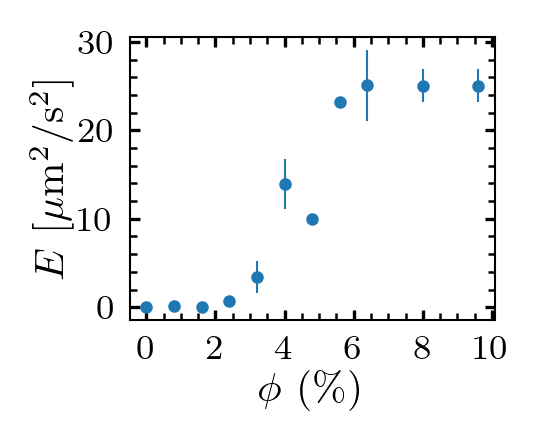

In [26]:
# load data and plot
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order').drop(index=9)
# data = data.dropna()

plt.figure(dpi=300)
plt.errorbar(data['conc'] * 0.08, data['energy_avg'] * 0.33 * 0.33, yerr=data['energy_std']* 0.33 * 0.33, ls='', elinewidth=0.5, marker='o', markersize=2)
# plt.xlabel('$n$ [n$_0$]')
plt.xlabel('$\phi$ (\%)')
plt.ylabel('$E$ [$\mu$m$^2$/s$^2$]')
plt.xticks([0, 2, 4, 6, 8, 10])

In [24]:
data

,conc,1,2,3,energy_avg,energy_std,1.1,2.1,3.1,order_avg,order_std
0,0,0.37,0.37,0.38,0.373333,0.005774,0.04,0.04,0.04,0.040000,0.000000
1,10,0.94,0.97,0.85,0.920000,0.062450,0.14,0.15,0.18,0.156667,0.020817
2,20,0.18,0.79,0.26,0.410000,0.331512,0.24,0.37,0.30,0.303333,0.065064
3,30,3.15,4.76,11.76,6.556667,4.577558,0.33,0.48,0.51,0.440000,0.096437
4,40,12.58,43.88,37.89,31.450000,16.614081,0.64,0.62,0.89,0.716667,0.150444
5,50,109.08,156.98,117.41,127.823333,25.591613,0.62,0.64,0.65,0.636667,0.015275
6,60,89.03,92.72,93.27,91.673333,2.305652,0.63,0.71,0.73,0.690000,0.052915
7,70,212.49,214.14,NaN,213.315000,1.166726,0.66,0.68,0.70,0.680000,0.020000
8,80,256.62,NaN,204.65,230.635000,36.748339,0.64,0.66,0.55,0.616667,0.058595
9,85,195.66,219.76,NaN,207.710000,17.041273,0.69,0.71,0.72,0.706667,0.015275


### (d) concentration dependence of $OP$

In [115]:
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order')

Text(0, 0.5, '$OP$')

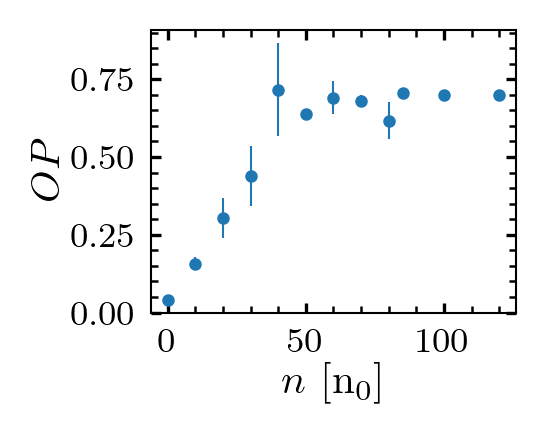

In [116]:
plt.figure(dpi=300)
plt.errorbar(data['conc'], data['order_avg'], yerr=data['order_std'],
                ls='', marker='o', markersize=2, mew=1, lw=0.5)
plt.xlabel('$n$ [n$_0$]')
plt.ylabel('$OP$')

### (e) plot $\alpha$ and $E$ on the same axis

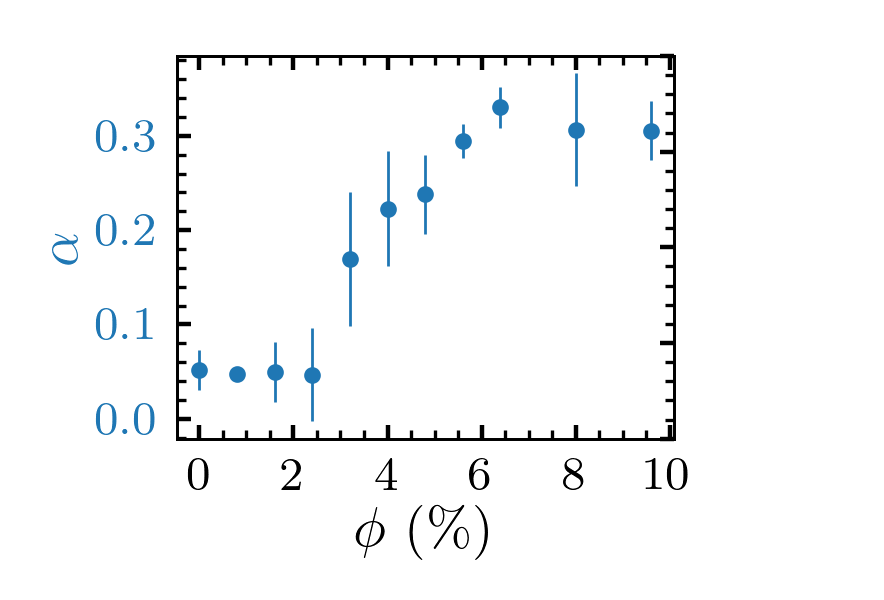

In [50]:
# load data and plot
fig, ax = plt.subplots(figsize=(2.25, 1.6), dpi=400)
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='df2')
# data = data.dropna()
ax.errorbar(data['conc'] * 0.08, data['avg'], yerr=data['std'], ls='', elinewidth=0.5, marker='o', markersize=2)
# ax.set_xlabel('$n$ [n$_0$]')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$\\alpha$', color=bestcolor(0))
ax.tick_params(axis='y', labelcolor=bestcolor(0))
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.set_xticks([0, 2, 4, 6, 8, 10])

ax1 = ax.twinx()
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order').drop(index=9)
# ax1.errorbar(data['conc'] * 0.08, data['energy_avg'] * 0.33 * 0.33, yerr=data['energy_std']* 0.33 * 0.33, 
#              ls='', elinewidth=0.5, marker='o', markersize=2, color=bestcolor(1))
ax1.set_ylabel('$E$ [$\mu$m$^2$/s$^2$]', color=(0,0,0,0))#color=bestcolor(1))
ax1.tick_params(axis='y',  labelcolor=(0,0,0,0))#labelcolor=bestcolor(1))
# ax1.set_yticks([0, 10, 20, 30])
# ax1.set_ylim([-6, 31])

plt.tight_layout()
# fig.savefig(r'E:\Google Drive\Research projects\DF\presentation\alpha&E\alpha&E.png')

([<matplotlib.axis.XTick at 0x25db186eb88>,
 <a list of 6 Text major ticklabel objects>)

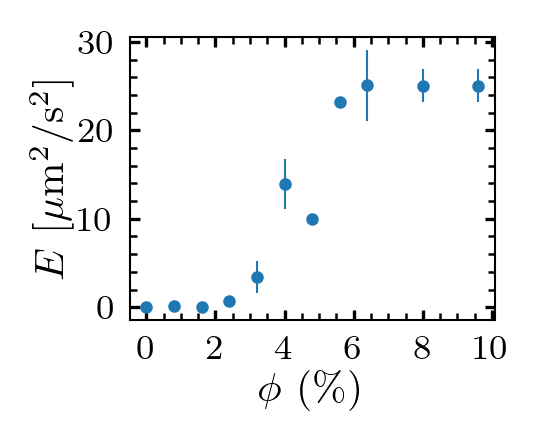

In [26]:
# load data and plot
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='energy_order').drop(index=9)
# data = data.dropna()

plt.figure(dpi=300)
plt.errorbar(data['conc'] * 0.08, data['energy_avg'] * 0.33 * 0.33, yerr=data['energy_std']* 0.33 * 0.33, ls='', elinewidth=0.5, marker='o', markersize=2)
# plt.xlabel('$n$ [n$_0$]')
plt.xlabel('$\phi$ (\%)')
plt.ylabel('$E$ [$\mu$m$^2$/s$^2$]')
plt.xticks([0, 2, 4, 6, 8, 10])

### Miscellaneous

- summarize alpha data

In [1]:
# Summarize data from each raw data folders
dates = ['08032020', '08042020', '08052020', '08062020']
sampling_range = 1 # range between 0 and 1, above which we sample the alpha values and average
fitting_range = [10, ] # um
############################################

for date in dates:
    date_folder = r'D:\density_fluctuations\{}'.format(date)
    k_master_folder = os.path.join(date_folder, 'df2_kinetics')
    i_master_folder = os.path.join(date_folder, 'overall_intensity')
    sfL = next(os.walk(k_master_folder))[1]
    alpha_list = []
    n_list = []
    for sf in sfL:
        n = int(sf)
        fps = data_log()[date]['fps'][n]
        k_folder = r'D:\density_fluctuations\{0}\df2_kinetics\{1:02d}'.format(date, n)
        i_folder = r'D:\density_fluctuations\{0}\overall_intensity\{1:02d}'.format(date, n)
        k_data = pd.read_csv(os.path.join(k_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        data = plot_kinetics(k_data, i_data, tlim=None, xlim=[5, 100], lb=10, mpp=0.33, seg_length=50, fps=fps, plot=False)
        df = pd.DataFrame().assign(t=data['t0'], alpha=data['alpha'])
        alpha = df['alpha'].loc[df['t']>=df['t'].max()*sampling_range].mean()
        n_list.append(n)
        alpha_list.append(alpha)
    data = pd.DataFrame({'n': n_list, 'alpha': alpha_list})
    data.to_csv(os.path.join(k_master_folder, 'summary.csv'), index=False)

- summarize OP data

In [ ]:
eo_folder = r'D:\density_fluctuations\08042020\energy_order'
sfL = next(os.walk(eo_folder))[1]
OP_list = []
E_list = []
for sf in sfL:
    print('summarizing data in {}'.format(sf))
    eo_data = pd.read_csv(os.path.join(eo_folder, sf, 'energy_order.csv'))
    eo_data_crop = eo_data.loc[eo_data.t>eo_data.t.max()*0.9]
    E = eo_data_crop.E.mean()
    E_list.append(E)
    OP = eo_data_crop.OP.mean()
    OP_list.append(OP)

In [ ]:
data = pd.DataFrame().assign(sample=sfL, E=E_list, OP=OP_list)
data.to_csv(os.path.join(eo_folder, 'eo_summary.csv'), index=False)

## Figure 4: evolution

- (a) standard deviation during the onset of active turbulence
- (b) temporal evolution of $\alpha$, $E$ and $OP$

### Evolution plots gallery

|concentration|sample 1|sample 2|sample 3|
|:---------:|:---------:|:---------:|:---------:|
|85|![](temp_data\kinetics_eo\85-1.png)|![](temp_data\kinetics_eo\85-2.png)|![](temp_data\kinetics_eo\85-3.png)|
|80|![](temp_data\kinetics_eo\80-1.png)|![](temp_data\kinetics_eo\80-2.png)|![](temp_data\kinetics_eo\80-3.png)|
|70|![](temp_data\kinetics_eo\70-1.png)|![](temp_data\kinetics_eo\70-2.png)|![](temp_data\kinetics_eo\70-3.png)|
|60|![](temp_data\kinetics_eo\60-1.png)|![](temp_data\kinetics_eo\60-2.png)|![](temp_data\kinetics_eo\60-3.png)|
|50|![](temp_data\kinetics_eo\50-1.png)|![](temp_data\kinetics_eo\50-2.png)|![](temp_data\kinetics_eo\50-3.png)|
|40|![](temp_data\kinetics_eo\40-1.png)|![](temp_data\kinetics_eo\40-2.png)|![](temp_data\kinetics_eo\40-3.png)|
|30|![](temp_data\kinetics_eo\30-1.png)|![](temp_data\kinetics_eo\30-2.png)|![](temp_data\kinetics_eo\30-3.png)|
|20|![](temp_data\kinetics_eo\20-1.png)|![](temp_data\kinetics_eo\20-2.png)|![](temp_data\kinetics_eo\20-3.png)|
|10|![](temp_data\kinetics_eo\10-1.png)|![](temp_data\kinetics_eo\10-2.png)|![](temp_data\kinetics_eo\10-3.png)|
|0|![](temp_data\kinetics_eo\0-1.png)|![](temp_data\kinetics_eo\0-2.png)|![](temp_data\kinetics_eo\0-3.png)|

### (a) standard deviation during the onset of active turbulence

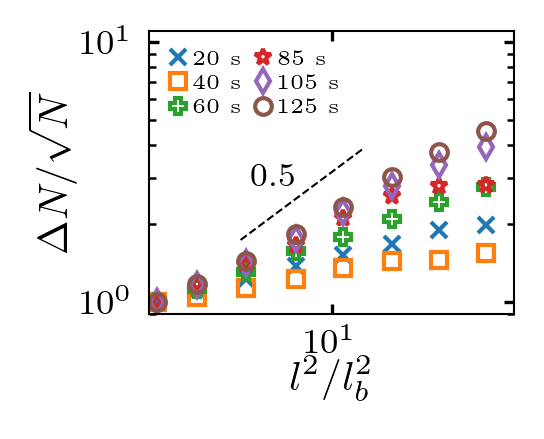

In [6]:
seg_length = 50
k_data = pd.read_csv(r'D:\density_fluctuations\06232020\df2_kinetics_norm\01\kinetics_data.csv'.format(seg_length))
plot_data, fig, ax = plot_std(k_data, seg_length, tlim=[20, 150], xlim=[1, 100], lb=10, mpp=0.33, fps=10, num_curves=6)
# guide of the eye slope
x = np.array([3, 15])
y = x**0.5 * 1
ax.plot(x, y, lw=0.5, ls='--', color='black')
ax.text(0.6*x[0]+0.11*x[1], y.mean(), '0.5', {'fontsize': 8})
ax.axis([0.9, 110, 0.9, 11])
ax.legend(ncol=2, fontsize=5, loc='upper left')

### (b) temporal evolution of $\alpha$, $E$ and $OP$

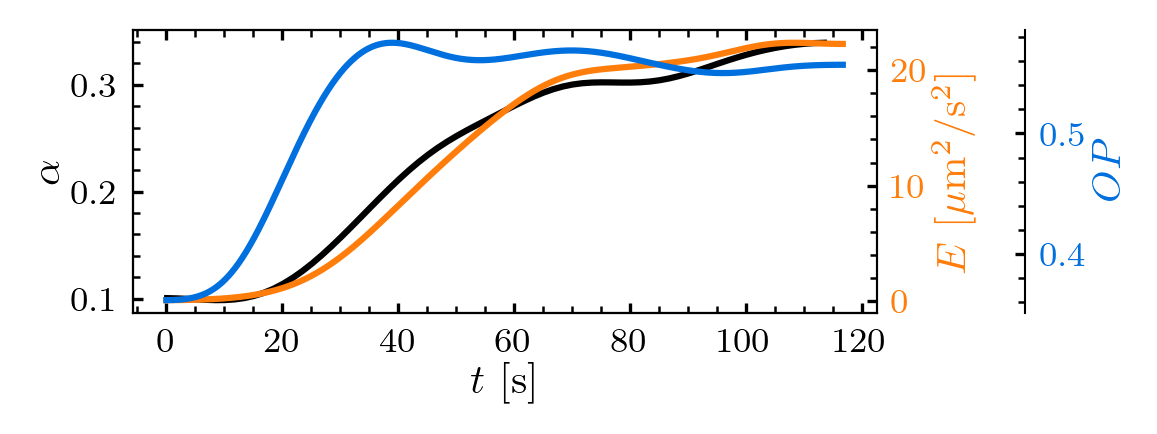

In [3]:
data_path = r'E:\moreData\08032020'
n = 2
k_data = pd.read_csv(os.path.join(data_path, 'df2_kinetics\{:02d}\kinetics_data.csv'.format(n)))
i_data = pd.read_csv(os.path.join(data_path, 'overall_intensity\{:02d}\intensity.csv'.format(n)))
eo_data = pd.read_csv(os.path.join(data_path, 'energy_order\{:02d}\energy_order.csv'.format(n)))
tm.prl('1-column-1-panel')
data = plot_kinetics_eo(k_data, i_data, eo_data, xlim=100, seg_length=50, fps=30, plot=False)
data = kinetics_eo_from_light_on(data, plot=False)
new_data, fig, ax = kinetics_eo_smooth(data)
# fig.savefig(os.path.join(data_path, 'df2_kinetics\{:02d}.svg'.format(n)))

## Figure 5: local correlations between concentration fluctuations and flow energy 
- main: local correlations between concentration fluctuations and flow energy 
- Inset: show two fields with high correlation at an instance

### main

In [5]:
data = pd.read_excel(io=r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='flow_conc_corr')

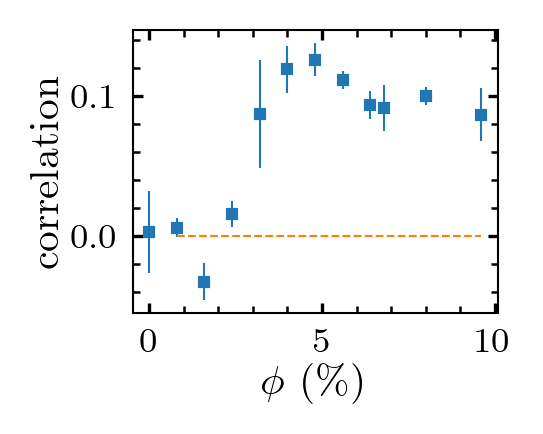

In [8]:
# tm.prl('1-column-2-panel')
plt.figure(dpi=300)
markers = {'energy': 's', 'convection': '^'}
labels = {}
labels['convection'] = r'$(v\cdot\nabla c)^2$'
labels['energy'] = r'$v^2$'

for kw in markers:
    if kw != 'convection':
        plt.errorbar(data['conc'] * 0.08, data[kw], yerr=data[kw+'_err'], label=labels[kw],
                ls='', marker=markers[kw], markersize=2, mew=1, lw=0.5)
    

# plt.legend(loc='right', fontsize=5)
plt.xlabel('$\phi$ (\%)')
plt.ylabel('correlation')
plt.plot([0.8, 9.6], [0, 0], ls='--', lw=0.5)

### inset

0.25317831613862163


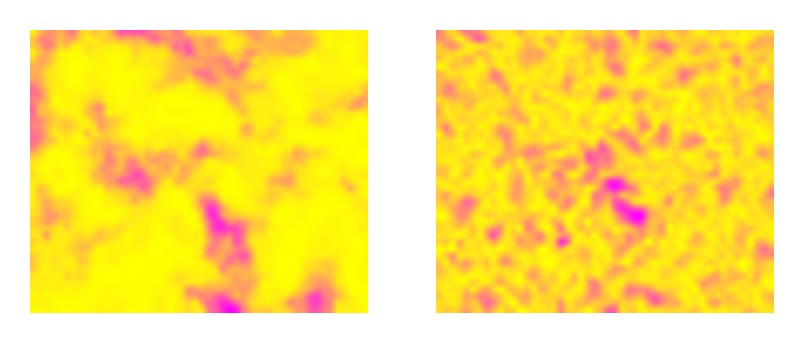

In [42]:
n = 1400
pivDir = r'E:\moreData\08032020\piv_imseq\05\{:04d}-{:04d}.csv'.format(n, n+1)
X, Y, U, V = read_piv(pivDir)
E = U**2 + V**2
# E = np.load(r'E:\moreData\08032020\flow_derivs\05\convection\{0:04d}-{1:04d}.npy'.format(n, n+1)) ** 2
ldfDir = r'E:\moreData\08032020\local_df\05\dt=10\{:04d}.npy'.format(n) 
LDF = np.load(ldfDir)
tm.prl('1-column-1-panel')
fig, ax = plt.subplots(nrows=1, ncols=2, dpi=300)
ax[0].imshow(-E, interpolation='spline16', cmap='spring')
ax[1].imshow(-LDF, interpolation='spline16', cmap='spring')
ax[0].axis('off')
ax[1].axis('off')
print(corr2d(E, LDF))

### Summary

In [ ]:
folder = r'D:\density_fluctuations\08062020\local_df'
sfL = next(os.walk(folder))[1]
avg_list = []
for sf in sfL:
    print('summarizing data in {}'.format(sf))
    df_folder = os.path.join(folder, sf, 'dt=10')
    piv_folder = r'D:\density_fluctuations\08062020\piv_imseq\{}'.format(sf)
    l = readdata(df_folder, 'npy')
    l = l.loc[l.Name.astype('int')>l.Name.astype('int').max()*0.8]
    corr_list = []
    for num, i in l.iterrows():
        df = np.load(i.Dir)
        n = int(i.Name)
        pivData = pd.read_csv(os.path.join(piv_folder, '{0:04d}-{1:04d}.csv'.format(n, n+1)))
        v = np.array(pivData.u**2 + pivData.v**2).reshape((42, 50))
        corr = corr2d(df, v)
        corr_list.append(corr)
    avg_corr = np.array(corr_list).mean()
    avg_list.append(avg_corr)
    print('{0}: {1:.3f}'.format(sf, avg_corr))

In [ ]:
data = pd.DataFrame().assign(sample=sfL, E=avg_list)
data.to_csv(os.path.join(folder, 'corr_E_sl=10.csv'), index=False)

## 6. Dimensionality effect

Probe dimensionality effect by gradually changing the chamber thickness (200, 140, 100, <del>20</del>)

Text(0, 0.5, '$E$ [px$^2$/s$^2$]')

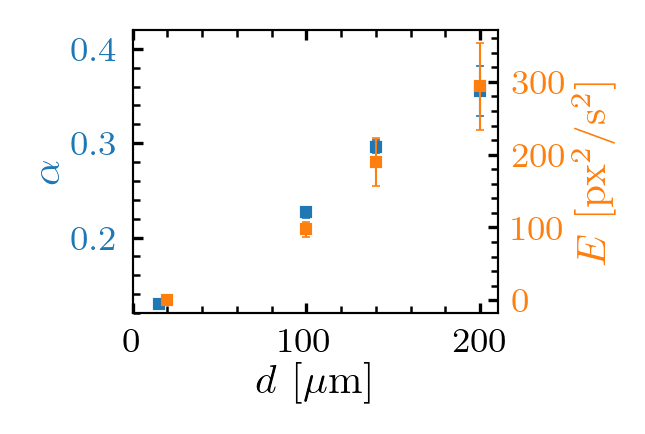

In [65]:
tm.prl('1-column-2-panel')
fig, ax = plt.subplots(dpi=300)
color = bestcolor(0)
data = pd.read_excel(r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='dimensionality')
data = data.drop([1])
ax.errorbar(data['thickness'], data['alpha_avg'], yerr=data['alpha_std'], 
            ls='', marker='s', markersize=2, lw=0.5, color=color, capsize=1, capthick=0.4)
ax.tick_params(axis='y', labelcolor=color)
ax.set_xlabel('$d$ [$\mu$m]')
ax.set_ylabel('$\\alpha$', color=color)
ax.set_ylim([0.12, 0.42])
ax.set_xlim([0, 210])
ax1 = ax.twinx()
color = bestcolor(1)
data = pd.read_excel(r'E:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='dimensionality')
ax1.errorbar(data['thickness'], data['energy_avg'], yerr=data['energy_std'], 
             ls='', marker='s', markersize=2, lw=0.5, color=color, capsize=1, capthick=0.4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('$E$ [px$^2$/s$^2$]', color=color)

## Figure 7: $\alpha$ as a function of $E$

This relationship has been suggested by other observations with strong enough evidence. Can we take a step forward, to ask what is the quantitative dependence? Though this dependence has been seen in many different conditions, such as different gap sizes and different concentrations, the quantitative dependece can be also different under these conditions. Thus, if I plot $\alpha$ as a function of $E$, data points obtained from the same condition set may show similar trend and relation, but data from different conditions may deviate. This potential scenerio, while posing difficulty in drawing simple conclusion, can allow us to understand it better.

#### How many data points do I have?

Each video gives me approximately 3000 frames - corresponding to 1500 velocity field data. However, the $\alpha$ data is much fewer, 3000 frames should only give 60 points. The 50 videos should in total provide 50*60=3000 data points. Let's get started with the first video: 08032020/00 

#### A function that extract and rearrange the data into two 2 columns: ('energy', 'alpha')

In [68]:
def rearrange_energy_alpha(k_data, i_data, eo_data, xlim=[1, 100], seg_length=50, fps=30):
    """
    Extract and rearrange energy and alpha data.
    
    Args:
    k_data -- kinetics data, read from df2_kinetics folder
    i_data -- image intensity data, read from overall_intensity folder
    eo_data -- energy and order parameter data, read from energy_order folder
    xlim -- range of x for alpha fitting (determined roughly by correlation length)
    seg_length -- segment length for analyzing temporal fluctuations
    fps -- frame per second of video
    
    Returns:
    ea_data -- energy and alpha data, as a DataFrame
    """
    
    data = plot_kinetics_eo(k_data, i_data, eo_data, tlim=None, xlim=xlim, lb=10, mpp=0.33, seg_length=seg_length, fps=fps, plot=False)
    new_data = kinetics_eo_from_light_on(data, plot=False)
    
    E_list = []
    for t in new_data['t0']:
        E = new_data['E'][abs(new_data['t2'] - t).argmin()]
        E_list.append(E)

    ea_data = pd.DataFrame().assign(energy=E_list, alpha=new_data['alpha'])
    
    return ea_data

In [37]:
ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
ea_data.head()

,energy,alpha
0,0.478633,0.080045
1,0.559931,0.098804
2,0.496495,0.107986
3,0.417108,0.070891
4,0.442863,0.096820


#### Plot all data in a scatter plot

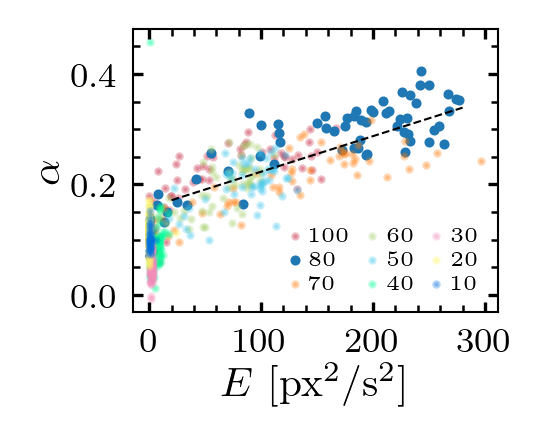

In [89]:
dirs = data_log_mapping(kw='aug')
count = 0 # used for coloring
collection = [] # collect ea data from all videos
fig, ax = plt.subplots(dpi=300)
for kw in dirs:
    if kw != '00' and kw != '85' and kw != '120':
        d = dirs[kw][0]
        date, num = d.split('-')
        folder = r'E:\moreData\{}'.format(date)
        n = int(num)
        eo_folder = os.path.join(folder, 'energy_order\{:02d}'.format(n))
        df_folder = os.path.join(folder, 'df2_kinetics\{:02d}'.format(n))
        i_folder = os.path.join(folder, 'overall_intensity\{:02d}'.format(n))
        eo_data = pd.read_csv(os.path.join(eo_folder, 'energy_order.csv'))
        k_data = pd.read_csv(os.path.join(df_folder, 'kinetics_data.csv'))
        i_data = pd.read_csv(os.path.join(i_folder, 'intensity.csv'))
        ea_data = rearrange_energy_alpha(k_data, i_data, eo_data)
        ### Highlight a concentration #################################################
        if kw == '80': 
            ax.scatter(ea_data['energy'], ea_data['alpha'], s=2, color=bestcolor(0), 
                        label=kw)
        else:
            ax.scatter(ea_data['energy'], ea_data['alpha'], s=1, color=wowcolor(count), 
                        label=kw, alpha=0.3)
        ###############################################################################
        collection.append(ea_data)
        count += 1
ax.set_xlabel('$E$ [px$^2$/s$^2$]')
ax.set_ylabel('$\\alpha$')
ax.legend(loc='lower right', ncol=3, fontsize=5)
ax.set_xticks([0, 100, 200, 300])

# linear fitting ############################
b = pd.concat(collection, axis=0)
subdata = b.loc[b.energy>20]
x = subdata.energy
y = subdata.alpha
p = np.polyfit(x, y, deg=1)
# plot fitting line #########################
x = np.array([20, 280])
y = p[0] * x + p[1]
ax.plot(x, y, ls='--', color='black', lw=0.5)

## Figure 8: energy spectrum analysis

- (a) energy spectrum at various concentrations
- (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations

### (a) energy spectrum at various concentrations

In [7]:
conc = [120, 100, 85, 80, 70, 60, 50, 40, 30, 20, 10]
folders = ['08062020', '08062020', '08052020', '08032020', '08042020', '08032020', '08042020', '08032020', '08042020', '08032020', '08042020']
sample_num = [range(3, 6), range(0, 3), range(3, 6), range(0, 3), range(0, 3), range(3, 6), range(3, 6), range(6, 9), range(6, 9), range(9, 12), range(9, 12)]

E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1239: RuntimeWarning: invalid value encountered in true_divide
  np.histogram(xo, x)[0])
E:\Github\Python\Correlation\src\corr_utils.py:1

Text(0, 0.5, '$E$ ($\\mu$m$^3$/s$^2$)')

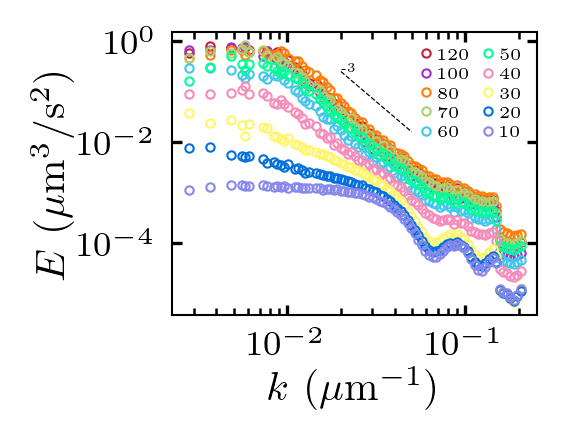

In [9]:
data_list = []
fig, ax = plt.subplots(dpi=300)
count1 = 0
for c, f, s in zip(conc, folders, sample_num):
    if c == 85:
        continue
    summary = pd.read_csv(os.path.join(r'E:\moreData', f, r'energy_spectrum_10\summary.csv')).set_index('k')
    for count, num in enumerate(s):
        temp_data = summary.loc[summary['sample'].astype('int')==num]
        if count == 0:
            data = temp_data
        else:
            data += temp_data
    data /= count + 1
    x, y = xy_bin(data.index, data.E, mode='log')
    ###########################################
    # log_bin() bins data to a set of evenly distributed xo in logspace
    # the data in each bin are averages of yo in that bin, these are the output of log_bin(), x and y given above
    # However, we noticed that the 1D energy spectrum should actually be the sum of 2D energy spectrum in a ring with fixed width dk.
    # This sum can also be written as mean*area(or circumference 2*pi*k, given constant width dk)
    # Here, the circumference is 2*pi*k, where k is x in the code
    # so the following line reflect this modification
    y *= 2*np.pi*x 
    ######################################
    data_list.append(np.stack([x, y], axis=1))    
    ax.plot(x, y, label=str(c), ls='', marker='o', markersize=2, mec=wowcolor(count1),
           mew=0.5, mfc=(0,0,0,0))
    count1 += 1
ax.legend(loc='upper right', ncol=2, fontsize=4)
ax.loglog()

# guide eye
x = np.array([0.02, 0.05])
y = x ** (-9/3) * 2e-6
plt.plot(x, y, color='black', ls='--', lw=0.3)
plt.text(x[0], y[0], '-3', {'fontsize':3})

ax.set_xlabel('$k$ ($\mu$m$^{-1}$)')
ax.set_ylabel('$E$ ($\mu$m$^3$/s$^2$)')

### (b) $\alpha$ and $\beta$ (opposite of energy spectrum exponent) at various concentrations

- Variation 1: function of concentration

In [32]:
conc = [120, 100, 80, 70, 60, 50, 40, 30, 20, 10]
expo = []
for data in data_list:
    x = data[:, 0]
    y = data[:, 1]
    ind = (x>=0.02) & (x<=0.05)
    p = np.polyfit(np.log(1/x[ind]), np.log(y[ind]), deg=1)
    expo.append(p[0])

(1.6, 3.2)

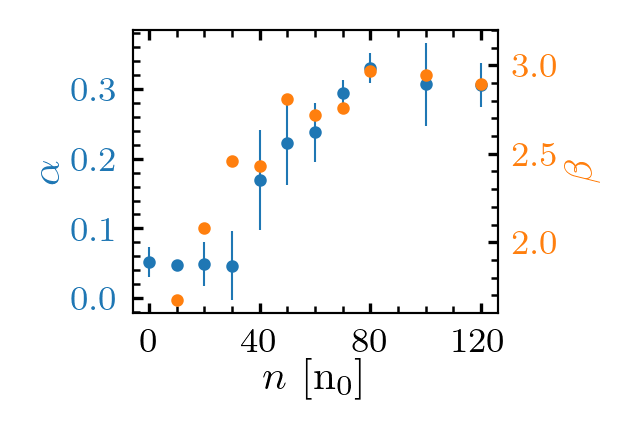

In [33]:
# load data and plot
fig, ax = plt.subplots(dpi=300)
data = pd.read_excel(io=r'I:\Google Drive\Research projects\DF\data\new_data_summary.xlsx', sheet_name='df2')
# data = data.dropna()
color = bestcolor(0)
ax.errorbar(data['conc'], data['avg'], yerr=data['std'], ls='', elinewidth=0.5, marker='o', markersize=2, color=color)
ax.set_xlabel('$n$ [n$_0$]')
ax.set_ylabel('$\\alpha$', color=color)
ax.set_xticks([0, 40, 80, 120])
ax.set_yticks([0, 0.1, 0.2, 0.3])
ax.tick_params(axis='y', labelcolor=color)
ax1 = ax.twinx()
color = bestcolor(1)
ax1.errorbar(conc, expo, ls='', elinewidth=0.5, marker='o', markersize=2, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylabel('$\\beta$', color=color)
ax1.set_ylim([1.6, 3.2])

- variation 2: $\alpha$ as a function of $\beta$

Text(0, 0.5, '$\\alpha$')

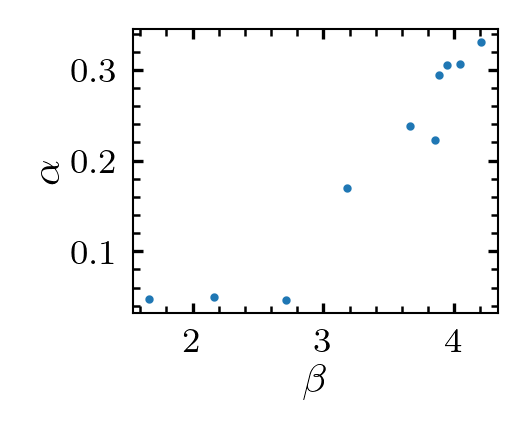

In [113]:
a = np.array([0.04716389, 0.04937141, 0.04650366, 0.16937538,
            0.22288722, 0.23788666, 0.29426366, 0.33027119, 0.30662842, 0.30552494])
b = np.array([1.66804347, 2.16258637, 2.71038463, 3.17843483, 3.85458976,
       3.66334863, 3.88697271, 4.20485619, 4.04525689, 3.94221949])
plt.figure(dpi=300)
plt.plot(b, a, ls='', marker='o', markersize=1)
plt.xlabel('$\\beta$')
plt.ylabel('$\\alpha$')

### (c) energy density at the limit k -> 0 (compare with simulation in [Bardfalvy 2019](https://pubs.rsc.org/en/content/articlelanding/2019/sm/c9sm00774a#!divAbstract))

In [18]:
len(data_list)

10

In [20]:
con = [120, 100, 80, 70, 60, 50, 40, 30, 20, 10]
E_list = []
for c, data in zip(con, data_list):
    y = data[:, 1]
    E = y[(np.isnan(y)==False)&(y>0)][0]
    E_list.append(E)

S:\Anaconda\3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


Text(0, 0.5, '$E_0$ ($\\mu$m$^3$/s$^2$)')

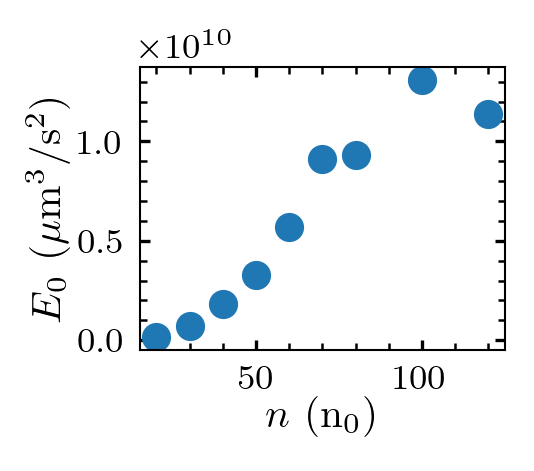

In [25]:
plt.figure(dpi=300)
plt.plot(con[:-1], E_list[:-1], ls='', marker='o')
plt.xlabel('$n$ (n$_0$)')
plt.ylabel('$E_0$ ($\mu$m$^3$/s$^2$)')

### Summary

In [3]:
folder = r'E:\moreData\08032020\energy_spectrum_10'
sfL = next(os.walk(folder))[1]
count = 0
for sf in sfL:
    es_folder = os.path.join(folder, sf) # for varstep, experiment number '00' needs to be included
    l = readdata(es_folder, 'csv')
    for num, i in l.iterrows():
        if num == 0:
            data = pd.read_csv(i.Dir)
        else:
            data += pd.read_csv(i.Dir)
    data /= num + 1
    if count == 0:
        summary = data.assign(sample=sf)
    else:
        summary = summary.append(data.assign(sample=sf))
    count += 1

In [5]:
summary.to_csv(os.path.join(folder, 'summary.csv'), index=False)

In [4]:
def summarize_es(folder):
    """
    Average energy spectrum data in each subfolder under folder, then save a summary.csv file under folder, containing all the averaged data.
    
    """
    sfL = next(os.walk(folder))[1]
    count = 0
    for sf in sfL:
        es_folder = os.path.join(folder, sf) # for varstep, experiment number '00' needs to be included
        l = readdata(es_folder, 'csv')
        for num, i in l.iterrows():
            if num == 0:
                data = pd.read_csv(i.Dir)
            else:
                data += pd.read_csv(i.Dir)
        data /= num + 1
        if count == 0:
            summary = data.assign(sample=sf)
        else:
            summary = summary.append(data.assign(sample=sf))
        count += 1
    summary.to_csv(os.path.join(folder, 'summary.csv'), index=False)

In [5]:
folders = ['08032020', '08042020', '08052020', '08062020']
for f in folders:
    folder = os.path.join(r'E:\moreData', f, 'energy_spectrum_10')
    summarize_es(folder)